# Importing Libraires and EDA

  Kaggle Challenge: https://www.kaggle.com/c/whats-cooking/overview
  
  Identify the cuisine from a list of given ingredients.

In [78]:
import json
import re
import nltk
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [79]:
train=pd.read_json("train.json")
test = pd.read_json('test.json')


In [80]:
train.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
cuisine        39774 non-null object
id             39774 non-null int64
ingredients    39774 non-null object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


In [98]:
train['cuisine'].nunique()

20

In [82]:
train['num_ingredients'] = train['ingredients'].apply(lambda x: len(x))

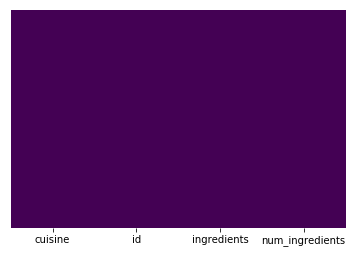

In [7]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

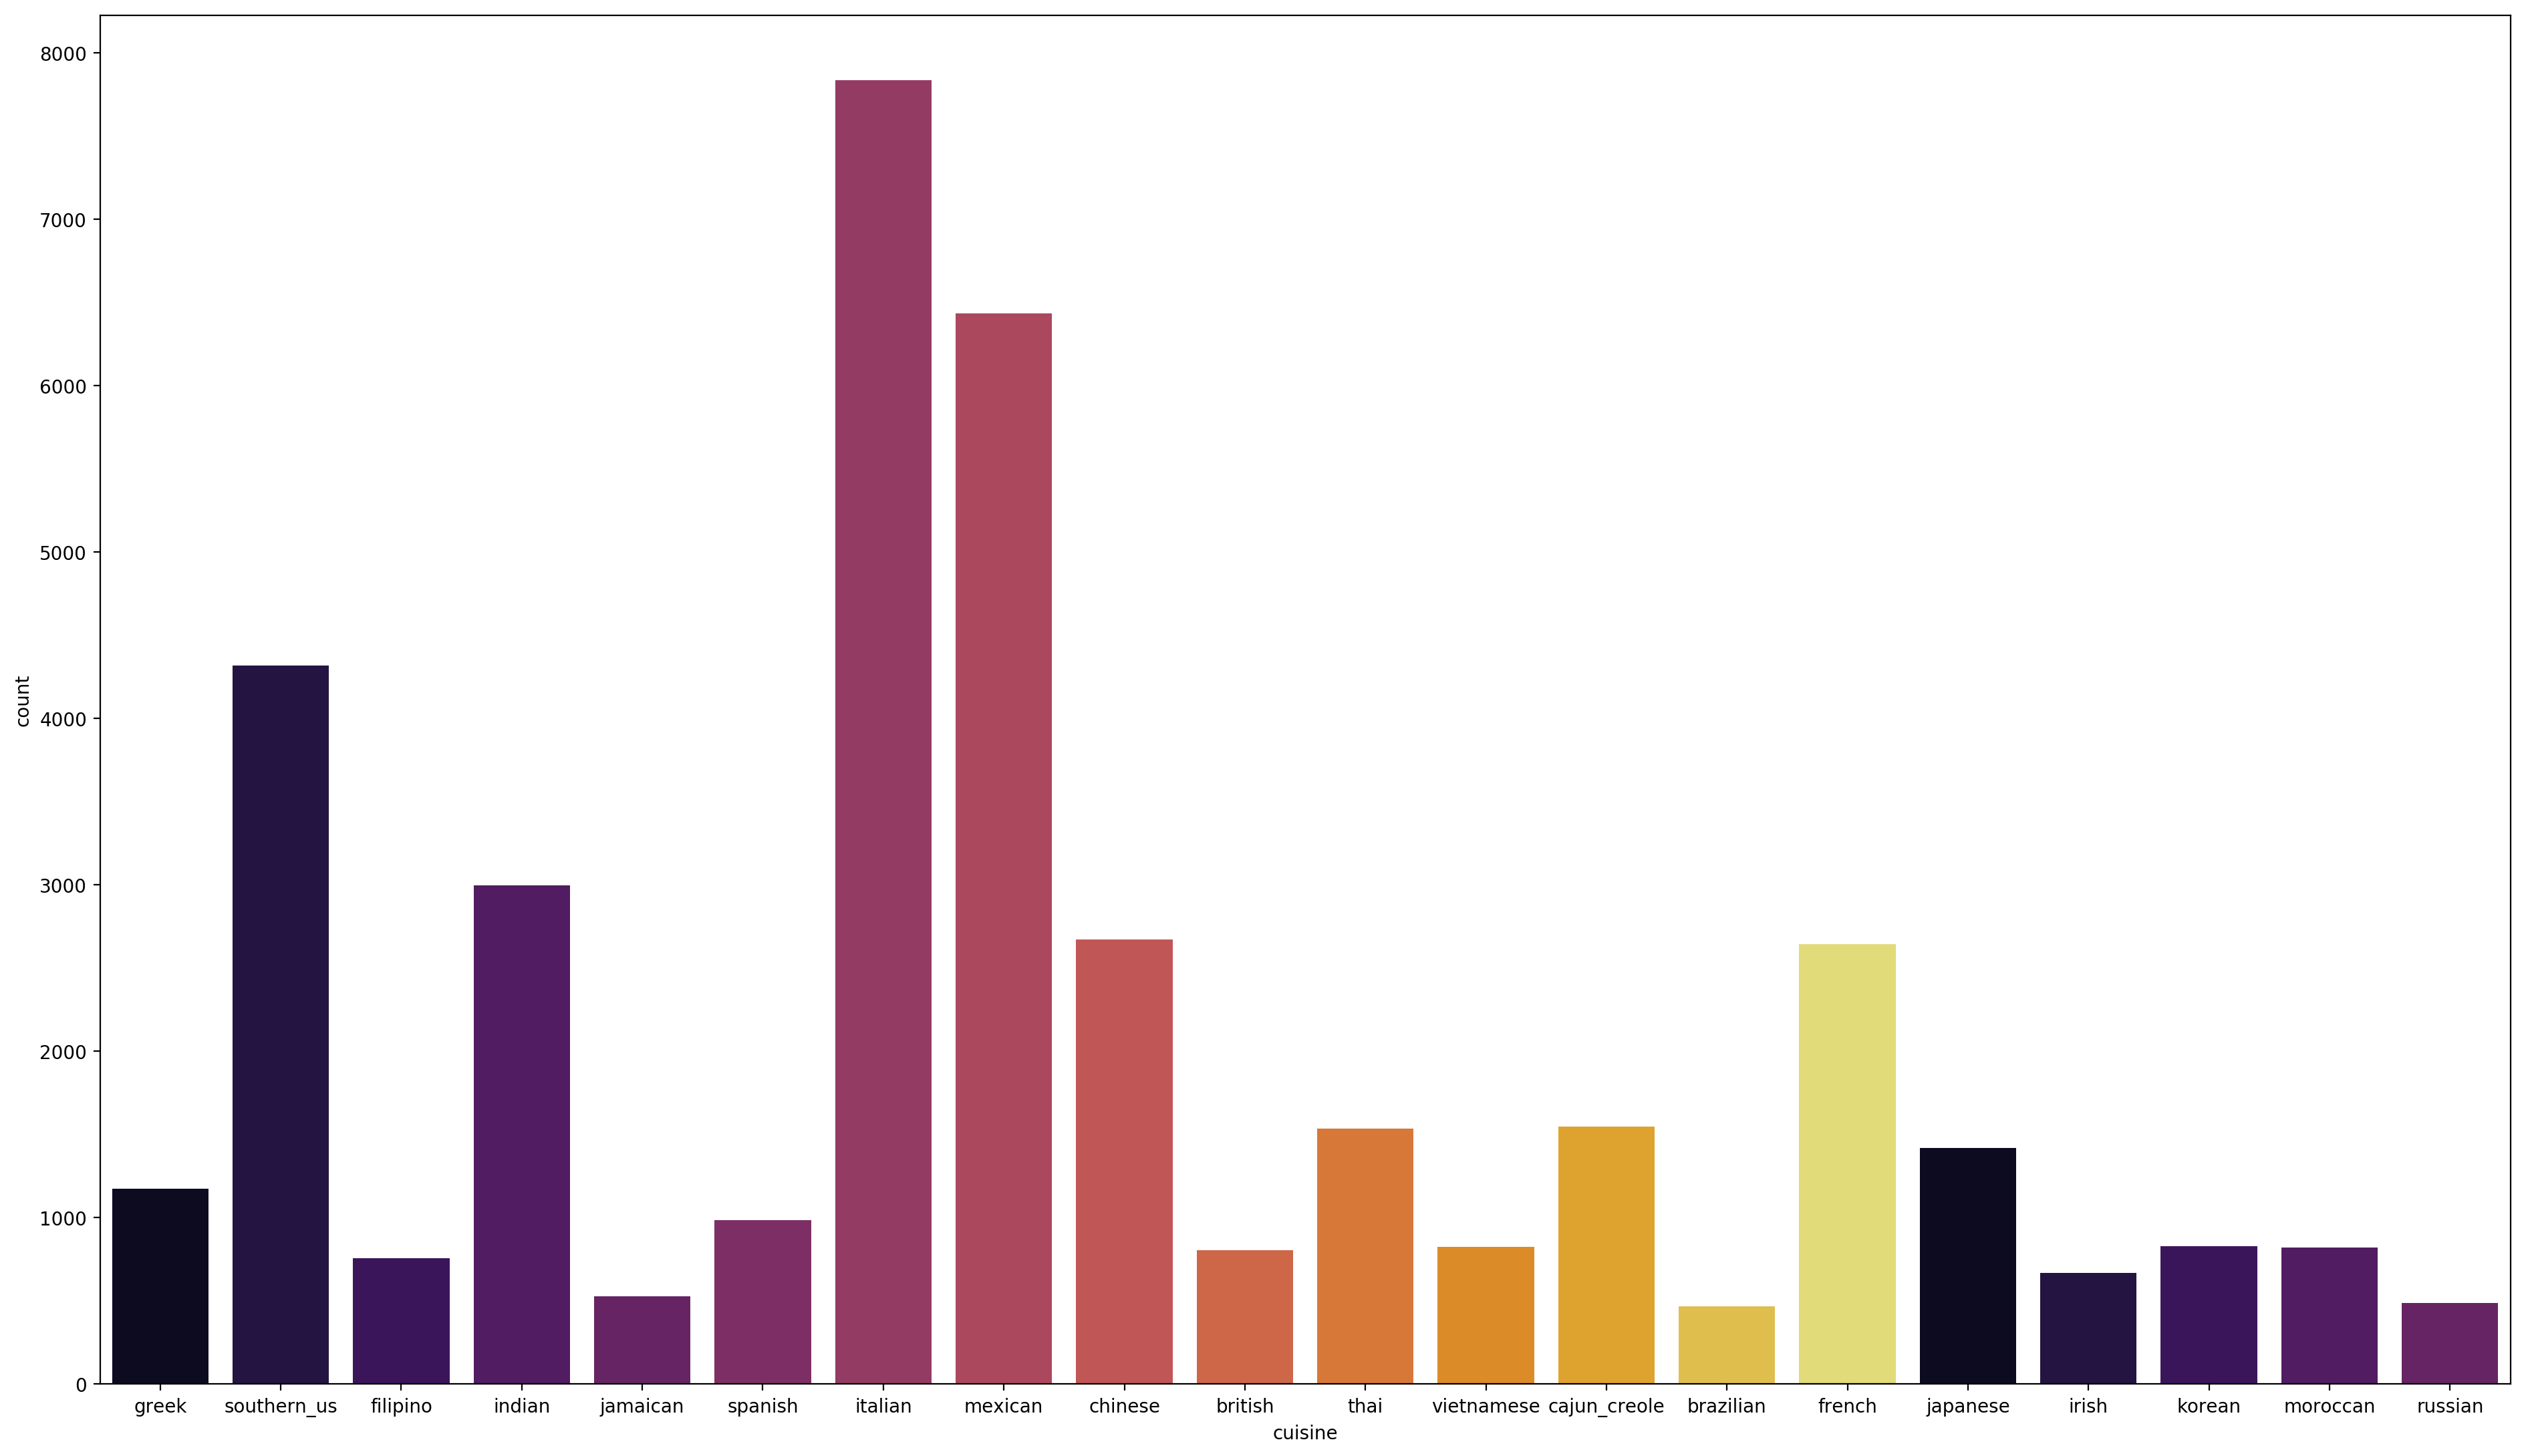

In [105]:
plt.figure(figsize=(19,11),dpi=200)
sns.countplot(x='cuisine', data=train,palette=sns.color_palette('inferno',15))
plt.tight_layout()

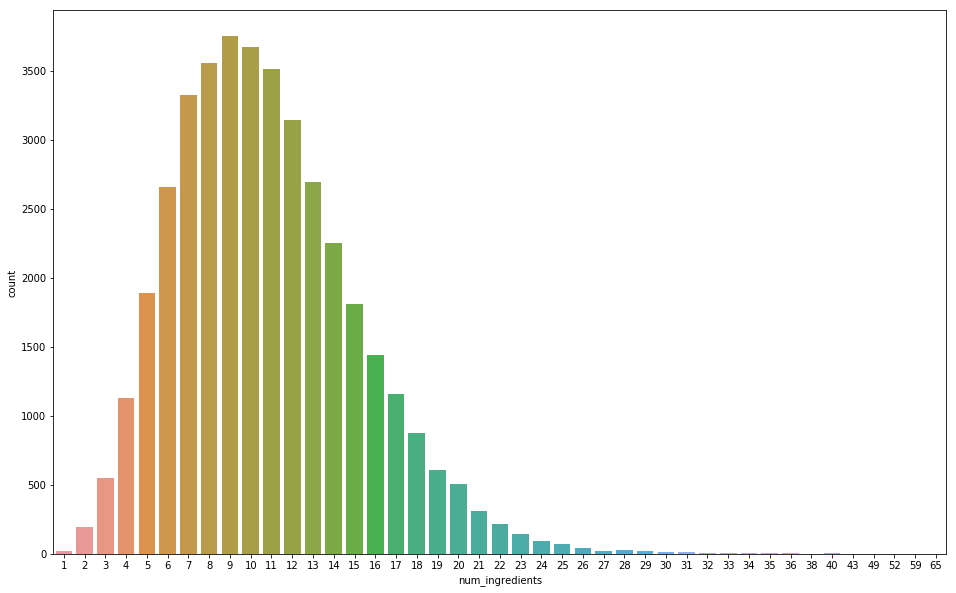

In [69]:
plt.figure(figsize=(16,10))
sns.countplot(x='num_ingredients', data=train)

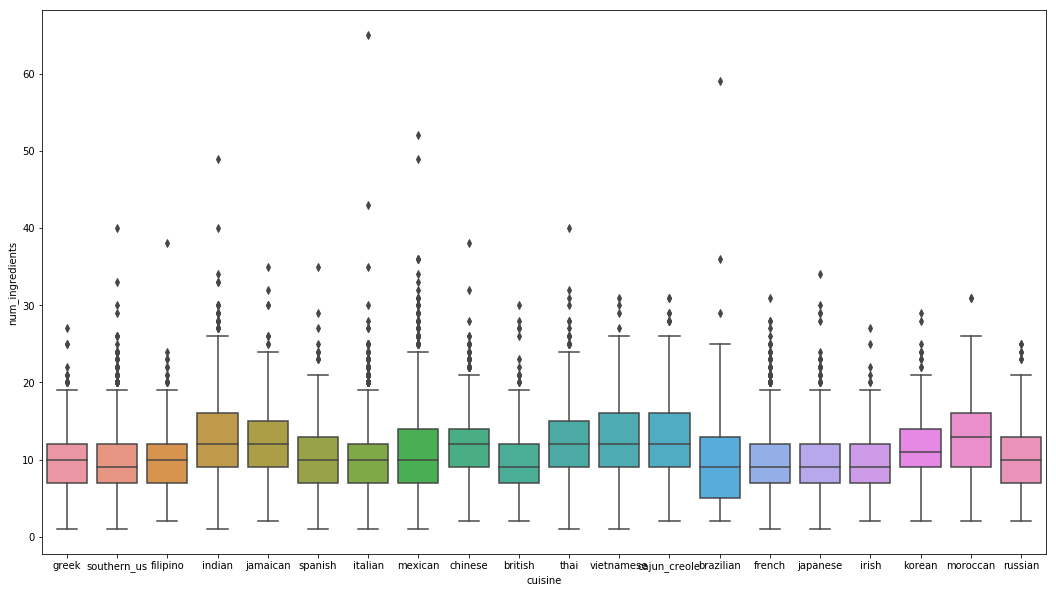

In [70]:
plt.figure(figsize=(18,10))

sns.boxplot(x="cuisine", y="num_ingredients", data=train)

pepper 25742
salt 24462
oil 23344
garlic 18941
ground 18271
fresh 17853
sauce 13129
sugar 12493
onions 12341
cheese 11776
chicken 11471
olive 10920
black 10753
water 9790
red 9189
flour 8851
butter 8648
tomatoes 8599
green 8531
powder 8290
['pepper', 'salt', 'oil', 'garlic', 'ground', 'fresh', 'sauce', 'sugar', 'onions', 'cheese', 'chicken', 'olive', 'black', 'water', 'red', 'flour', 'butter', 'tomatoes', 'green', 'powder']


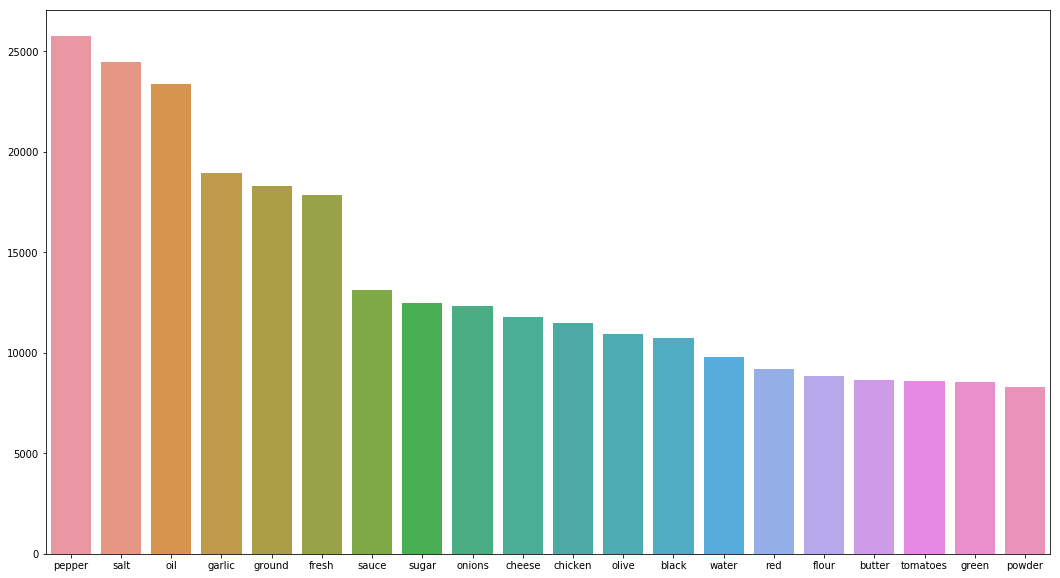

In [84]:
def get_top_20_ingredients(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
a=train['ingredients'].str.join(' ')
common_words = get_top_20_ingredients(a, 20)
for word, freq in common_words:
    print(word, freq)
plt.figure(figsize=(18,10))

x_val = [x[0] for x in common_words]
y_val = [x[1] for x in common_words]

print (x_val)
sns.barplot(x_val,y_val)
#plt.plot(x_val,y_val,'or')
#plt.bar(x_val,y_val,align='center')
x_label='Top ingredients'
y_label="Frequency"

In [85]:
train[train['num_ingredients'] <= 1]
#recipes which have have less than 1 ingredient are considered as outliers

,cuisine,id,ingredients,num_ingredients
940,japanese,4734,[sushi rice],1
2088,vietnamese,7833,[dried rice noodles],1
6787,indian,36818,[plain low-fat yogurt],1
7011,indian,19772,[unsalted butter],1
8181,japanese,16116,[udon],1
8852,thai,29738,[sticky rice],1
8990,indian,41124,[butter],1
10506,mexican,32631,[corn tortillas],1
13178,thai,29570,[grained],1
17804,southern_us,29849,[lemonade concentrate],1


In [86]:
train = train.drop(train[train['num_ingredients'] <= 1].index)

In [87]:
def text_process(mess):
    import string
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    x= [word.lower() for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    ##clean=re.sub(r'\W+', ' ',x)
    return x

In [88]:
train['ingredients']=train['ingredients'].str.join(' ')
test['ingredients']=test['ingredients'].str.join(' ')

In [89]:
from nltk.stem import WordNetLemmatizer  
wordnet_lemmatizer=WordNetLemmatizer()
train['ingredients'].apply(lambda x: wordnet_lemmatizer.lemmatize(x))

0        romaine lettuce black olives grape tomatoes ga...
1        plain flour ground pepper salt tomatoes ground...
2        eggs pepper salt mayonaise cooking oil green c...
3                           water vegetable oil wheat salt
4        black pepper shallots cornflour cayenne pepper...
5        plain flour sugar butter eggs fresh ginger roo...
6        olive oil salt medium shrimp pepper garlic cho...
7        sugar pistachio nuts white almond bark flour v...
8        olive oil purple onion fresh pineapple pork po...
9        chopped tomatoes fresh basil garlic extra-virg...
10       pimentos sweet pepper dried oregano olive oil ...
11       low sodium soy sauce fresh ginger dry mustard ...
12       Italian parsley leaves walnuts hot red pepper ...
13       ground cinnamon fresh cilantro chili powder gr...
14       fresh parmesan cheese butter all-purpose flour...
15       tumeric vegetable stock tomatoes garam masala ...
16       greek yogurt lemon curd confectioners sugar ra.

In [90]:
train['ingredients']

0        romaine lettuce black olives grape tomatoes ga...
1        plain flour ground pepper salt tomatoes ground...
2        eggs pepper salt mayonaise cooking oil green c...
3                           water vegetable oil wheat salt
4        black pepper shallots cornflour cayenne pepper...
5        plain flour sugar butter eggs fresh ginger roo...
6        olive oil salt medium shrimp pepper garlic cho...
7        sugar pistachio nuts white almond bark flour v...
8        olive oil purple onion fresh pineapple pork po...
9        chopped tomatoes fresh basil garlic extra-virg...
10       pimentos sweet pepper dried oregano olive oil ...
11       low sodium soy sauce fresh ginger dry mustard ...
12       Italian parsley leaves walnuts hot red pepper ...
13       ground cinnamon fresh cilantro chili powder gr...
14       fresh parmesan cheese butter all-purpose flour...
15       tumeric vegetable stock tomatoes garam masala ...
16       greek yogurt lemon curd confectioners sugar ra.

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(analyzer=text_process)

bow_transformer = cv.fit(train.ingredients)

In [15]:
text_bow = bow_transformer.transform(train['ingredients'])
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(text_bow)
text_tfidf = tfidf_transformer.transform(text_bow)



In [16]:
from sklearn.model_selection import train_test_split
X=text_tfidf
y=train['cuisine']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)


# Naive-Bayes Model(Baseline Model) -Score of .67 on kaggle

In [32]:
from sklearn.naive_bayes import MultinomialNB
text_model = MultinomialNB().fit(X_train,y_train)

In [34]:
pred=text_model.predict(X_test)

In [35]:
from sklearn.metrics import classification_report
print (classification_report(y_test,pred))
classificationReport=(classification_report(y_test,pred))


C:\Users\Jaspal\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jaspal\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jaspal\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jaspal\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_f

              precision    recall  f1-score   support

   brazilian       1.00      0.16      0.27       114
     british       0.80      0.03      0.06       272
cajun_creole       0.84      0.46      0.60       471
     chinese       0.59      0.91      0.71       802
    filipino       0.83      0.04      0.08       232
      french       0.51      0.38      0.44       803
       greek       0.88      0.23      0.37       379
      indian       0.76      0.91      0.83       899
       irish       0.89      0.04      0.08       202
     italian       0.62      0.90      0.73      2324
    jamaican       1.00      0.10      0.18       166
    japanese       0.91      0.55      0.68       394
      korean       0.98      0.31      0.47       268
     mexican       0.78      0.91      0.84      1919
    moroccan       0.99      0.29      0.45       270
     russian       0.00      0.00      0.00       158
 southern_us       0.49      0.79      0.60      1281
     spanish       0.95    

C:\Users\Jaspal\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# SVC Model

In [99]:
from sklearn.svm import SVC

In [106]:
model = SVC()
model.fit(X_train,y_train)

C:\Users\Jaspal\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [107]:
pred=model.predict(X_test)

In [108]:
from sklearn.metrics import classification_report
print (classification_report(y_test,pred))
classificationReport=(classification_report(y_test,pred))


C:\Users\Jaspal\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jaspal\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jaspal\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jaspal\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_f

              precision    recall  f1-score   support

   brazilian       0.00      0.00      0.00       114
     british       0.00      0.00      0.00       272
cajun_creole       0.00      0.00      0.00       471
     chinese       0.00      0.00      0.00       802
    filipino       0.00      0.00      0.00       232
      french       0.00      0.00      0.00       803
       greek       0.00      0.00      0.00       379
      indian       0.00      0.00      0.00       899
       irish       0.00      0.00      0.00       202
     italian       0.19      1.00      0.33      2324
    jamaican       0.00      0.00      0.00       166
    japanese       0.00      0.00      0.00       394
      korean       0.00      0.00      0.00       268
     mexican       0.00      0.00      0.00      1919
    moroccan       0.00      0.00      0.00       270
     russian       0.00      0.00      0.00       158
 southern_us       0.00      0.00      0.00      1281
     spanish       0.00    

C:\Users\Jaspal\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jaspal\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [14]:
test=pd.read_json("test.json")

In [15]:
test.ingredients.str.join(' ')

0       baking powder eggs all-purpose flour raisins m...
1       sugar egg yolks corn starch cream of tartar ba...
2       sausage links fennel bulb fronds olive oil cub...
3       meat cuts file powder smoked sausage okra shri...
4       ground black pepper salt sausage casings leeks...
5       baking powder all-purpose flour peach slices c...
6                      grape juice orange white zinfandel
7       ground ginger white pepper green onions orange...
8       diced onions taco seasoning mix all-purpose fl...
9       eggs cherries dates dark muscovado sugar groun...
10      pasta olive oil crushed red pepper cherry toma...
11      water butter ground sumac ground lamb ground c...
12      curry powder ground cumin chicken wings choppe...
13      pasta marinara sauce dried basil chicken finge...
14      salt custard powder white sugar eggs margarine...
15      vegetable oil cooking spray egg whites apricot...
16      vanilla ice cream banana liqueur bananas pinea...
17      molass

In [17]:
text_bow = cv.transform(test['ingredients'])

In [18]:
model.fit(X,y)
pred=model.predict(text_bow)
pred

C:\Users\Jaspal\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array(['italian', 'italian', 'italian', ..., 'italian', 'italian',
       'mexican'], dtype=object)

In [19]:
test['cuisine']=pred
test

,id,ingredients,cuisine
0,18009,baking powder eggs all-purpose flour raisins m...,italian
1,28583,sugar egg yolks corn starch cream of tartar ba...,italian
2,41580,sausage links fennel bulb fronds olive oil cub...,italian
3,29752,meat cuts file powder smoked sausage okra shri...,italian
4,35687,ground black pepper salt sausage casings leeks...,italian
5,38527,baking powder all-purpose flour peach slices c...,italian
6,19666,grape juice orange white zinfandel,italian
7,41217,ground ginger white pepper green onions orange...,chinese
8,28753,diced onions taco seasoning mix all-purpose fl...,mexican
9,22659,eggs cherries dates dark muscovado sugar groun...,italian


In [22]:
test.drop('ingredients',axis=1,inplace=True)

In [23]:
test.to_csv("submission_COOK.csv", encoding='utf-8', index=False)

In [24]:
test

,id,cuisine
0,18009,southern_us
1,28583,southern_us
2,41580,italian
3,29752,cajun_creole
4,35687,italian
5,38527,southern_us
6,19666,french
7,41217,chinese
8,28753,mexican
9,22659,british


# Random Forest Classifier(best result) Score of .736 on kaggle

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

In [ ]:
rfc.fit(X_train, y_train)

In [22]:
rfc_pred = rfc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

   brazilian       0.89      0.41      0.57       140
     british       0.82      0.24      0.38       246
cajun_creole       0.83      0.67      0.74       483
     chinese       0.71      0.88      0.79       801
    filipino       0.77      0.42      0.54       211
      french       0.56      0.50      0.53       785
       greek       0.81      0.54      0.65       354
      indian       0.80      0.91      0.85       874
       irish       0.83      0.32      0.47       191
     italian       0.69      0.90      0.78      2350
    jamaican       0.96      0.51      0.67       146
    japanese       0.85      0.58      0.69       440
      korean       0.90      0.60      0.72       249
     mexican       0.84      0.94      0.89      1988
    moroccan       0.91      0.59      0.72       247
     russian       0.82      0.24      0.37       153
 southern_us       0.63      0.78      0.70      1273
     spanish       0.85    

In [166]:
#WITH NO OUTLIERS AND LOWER CASE
rfc_pred = rfc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

   brazilian       0.41      0.13      0.20       146
     british       0.14      0.02      0.04       224
cajun_creole       0.69      0.29      0.40       484
     chinese       0.59      0.72      0.65       798
    filipino       0.53      0.11      0.18       227
      french       0.45      0.25      0.32       790
       greek       0.78      0.17      0.28       356
      indian       0.67      0.59      0.63       939
       irish       0.42      0.08      0.13       182
     italian       0.51      0.84      0.63      2336
    jamaican       0.68      0.14      0.23       152
    japanese       0.44      0.25      0.32       431
      korean       0.59      0.19      0.29       251
     mexican       0.57      0.75      0.65      1930
    moroccan       0.74      0.13      0.22       237
     russian       0.22      0.01      0.03       149
 southern_us       0.36      0.58      0.45      1290
     spanish       0.42    

In [187]:
#WITH NO OUTLIERS,LOWER CASE and joined through (' ')
rfc_pred = rfc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

   brazilian       0.85      0.44      0.58       157
     british       0.72      0.20      0.32       230
cajun_creole       0.78      0.65      0.71       457
     chinese       0.70      0.87      0.78       812
    filipino       0.84      0.46      0.60       234
      french       0.62      0.51      0.56       832
       greek       0.83      0.58      0.68       352
      indian       0.80      0.90      0.85       876
       irish       0.65      0.34      0.44       166
     italian       0.70      0.92      0.80      2426
    jamaican       0.98      0.51      0.67       156
    japanese       0.83      0.59      0.69       430
      korean       0.88      0.58      0.70       252
     mexican       0.83      0.94      0.88      1903
    moroccan       0.86      0.57      0.68       233
     russian       0.86      0.23      0.36       163
 southern_us       0.63      0.77      0.69      1255
     spanish       0.80    

In [23]:
rfc.fit(X,y)
pred=rfc.predict(text_bow)


In [24]:
test.drop('cuisine',axis=1,inplace=True)

In [25]:
test['cuisine']=pred
test

,id,ingredients,cuisine
0,18009,baking powder eggs all-purpose flour raisins m...,italian
1,28583,sugar egg yolks corn starch cream of tartar ba...,southern_us
2,41580,sausage links fennel bulb fronds olive oil cub...,italian
3,29752,meat cuts file powder smoked sausage okra shri...,cajun_creole
4,35687,ground black pepper salt sausage casings leeks...,italian
5,38527,baking powder all-purpose flour peach slices c...,southern_us
6,19666,grape juice orange white zinfandel,southern_us
7,41217,ground ginger white pepper green onions orange...,chinese
8,28753,diced onions taco seasoning mix all-purpose fl...,mexican
9,22659,eggs cherries dates dark muscovado sugar groun...,southern_us


In [26]:
test.drop('ingredients',axis=1,inplace=True)
test

,id,cuisine
0,18009,italian
1,28583,southern_us
2,41580,italian
3,29752,cajun_creole
4,35687,italian
5,38527,southern_us
6,19666,southern_us
7,41217,chinese
8,28753,mexican
9,22659,southern_us


In [27]:
test.to_csv("submission_RFC_COOK.csv", encoding='utf-8', index=False)

# Ensemble Model

In [19]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
vclf=VotingClassifier(estimators=[('clf1',LogisticRegression(random_state = 42)),
                                  ('clf2',SVC(kernel='linear',random_state = 42,probability=True)),
                                  ('clf3',RandomForestClassifier(n_estimators = 600,random_state = 42))], 
                                    voting='soft', weights = [1,1,1]) 
vclf.fit(X_train,y_train)


C:\Users\Jaspal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Jaspal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


VotingClassifier(estimators=[('clf1', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('clf2', SVC(C=...ators=600, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='soft',
         weights=[1, 1, 1])

In [20]:
pred=vclf.predict(X_test)
from sklearn.metrics import classification_report
print (classification_report(y_test,pred))
classificationReport=(classification_report(y_test,pred))

              precision    recall  f1-score   support

   brazilian       0.79      0.53      0.63       114
     british       0.64      0.33      0.44       272
cajun_creole       0.80      0.68      0.74       471
     chinese       0.80      0.87      0.83       802
    filipino       0.77      0.60      0.67       232
      french       0.61      0.64      0.62       803
       greek       0.86      0.68      0.76       379
      indian       0.87      0.92      0.89       899
       irish       0.72      0.48      0.58       202
     italian       0.79      0.91      0.84      2324
    jamaican       0.97      0.68      0.80       166
    japanese       0.84      0.71      0.77       394
      korean       0.85      0.75      0.80       268
     mexican       0.89      0.92      0.91      1919
    moroccan       0.83      0.76      0.79       270
     russian       0.77      0.42      0.55       158
 southern_us       0.68      0.83      0.75      1281
     spanish       0.74    

In [26]:
vclf.fit(X_train,y_train)
test = pd.read_json('test.json')
test['ingredients']=test.ingredients.str.join(' ')
text_bow = cv.transform(test['ingredients'])
pred=vclf.predict(text_bow)
pred

C:\Users\Jaspal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Jaspal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array(['british', 'southern_us', 'italian', ..., 'italian', 'southern_us',
       'mexican'], dtype=object)

In [27]:
test = pd.read_json('test.json')
test['cuisine']=pred
test.drop('ingredients',axis=1,inplace=True)
test

,id,cuisine
0,18009,british
1,28583,southern_us
2,41580,italian
3,29752,cajun_creole
4,35687,italian
5,38527,southern_us
6,19666,spanish
7,41217,chinese
8,28753,mexican
9,22659,british


In [31]:
test.to_csv("submission_ENSEMBLE_3a.csv", encoding='utf-8', index=False)